Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
%matplotlib inline
%precision 16
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Kayla Kim 

# Final - Fall Semester 2022

Guidelines for the final exam:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Only use ed-stem to ask private questions.  If you instead email please email me and the TAs. We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the final will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE the due date (and more so before the exam starts).

Good luck!

## Question 1

The partial differential equation of motion of an axially vibrating bar in the figure is
$$
    \frac{\partial^2 u}{\partial x^2} = \frac{\rho}{E} \frac{\partial^2 u}{\partial t^2}
$$
where $u(x,t)$ is the axial displacement (movement in the x-direction), $\rho$ the mass density, and $E$ the modulus of elasticity.  The boundary conditions for the beam depicted are $u(0, t) = u_x(L, t) = 0$.

![stuff](./beam_diagram.png)

**(a)** [10] If we want to find the linear vibrational modes in the lateral direction we can plug in a plane wave of the form $u(x, t) = y(x) \sin (\omega t)$.  Show that the equivalent ODE boundary value problem is
$$
    y'' = -\omega^2\frac{\rho}{E} y \quad \text{with} \quad y(0) = y'(L) = 0.
$$

YOUR ANSWER HERE

Given that we can plug in $u(x,t) = y(x)sin(\omega t)$ to find the linear vibrational modes in the lateral directions, 

$$
    u_x = y'(x)sin(\omega t) \\ 
    u_{xx} = y''(x) sin(\omega t) \\ 
    u_t = y(x) cos(\omega t) \omega \\ 
    u_{tt} = - \omega ^2 y(x) sin(\omega t) \\ 
$$

Plugging into the original PDE, we get the equivalent ODE BVP: 

$$
    y''(x)sin(\omega t) = \frac{\rho}{E}(-\omega ^2 y(x) sin(\omega t) \\
    y''(x) = \frac{\rho}{E}(-\omega ^2 y(x)) 
$$

Since the boundary conditions were given by changes in $x$, we can also express the boundary conditions as $y(0) = y'(L) = 0$. 

**(b)** [15] Using second order finite difference discretizations of the cantilever beam starting at the wall and ending at the free end (see the figure) write a system of equations that would express the ODE from part (a) as an eigenvalue problem while identifying the $\lambda$.  For the right boundary condition use the expression from the discretized, second order accurate, centered difference to find an expression for $Y_{N+1}$ and plug it in to the expression for equation centered at $x_N$.  Note that $Y_0 = 0$ by the boundary conditions.

YOUR ANSWER HERE

Reference: Lecture Note 16 ODE BVP (Linear System Approach) and Leveque Finite Diff (https://edisciplinas.usp.br/pluginfile.php/41896/mod_resource/content/1/LeVeque%20Finite%20Diff.pdf)

Write a system of equations that expresses $y'' = - \omega ^2 \frac{\rho}{E}y$ with boundary conditions $y(0) = y'(L) = 0$ as a system of equations/eigenvalue problem. identify $\lambda$. 

The unknown boundary values that we are solving for are 

$$
    Y = \begin{bmatrix} 
        Y_1 \\ 
        \vdots \\ 
        Y_N 
    \end{bmatrix}
$$

From lecture notes 16, the discretized 2nd order accurate centered different approximation for the 2nd derivative is given by: 

$$
    y_{xx} = \frac{Y_{N-1} - 2Y_N + Y_{N+1}}{\Delta x^2}
$$

We know from the given boundary conditions that $Y_0 = 0$ and $Y'_L = 0$. From the left boundary $Y_0 = 0$ we can solve for $Y_1$:

$$
    Y_1 = \frac{Y_{0} - 2Y_1 + Y_{2}}{\Delta x^2} = \frac{-2Y_1 + Y_2}{\Delta x^2} 
$$

which gives us the matrix $A$:
$$ 
    A = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 & 1 &    &    &    &    &    \\
        1 & -2 &  1 &    &    &    &    \\
          & 1 & -2 &  1 &    &    & \\
    & & \ddots & \ddots & \ddots
    \end{bmatrix} 
$$

To solve for the right boundary, $Y_N$, since we are given a Neumann boundary conditions, we need to use the 2nd order backward finite difference approximation for the 1st derivative (again from lecture note 16), to find an expression for $Y_{N+1}$

$$ \begin{aligned}
    y_x(L) \approx \frac{3Y_{N+1} - 4Y_N + Y_{N-1}}{2\Delta x} &= 0 \\ 
    3Y_{N+1} - 4Y_N + Y_{N-1} &= 0 \\
    Y_{N+1} &= \frac{4Y_N + Y_{N-1}}{3}
\end{aligned}
$$

Substituting this expression into the expression for the equation centered at $x_N$, we get: 

$$ \begin{aligned}
    Y_N &= \frac{Y_{N-1} - 2Y_N + Y_{N+1}}{\Delta x^2} \\
    &= \frac{Y_{N-1} - 2Y_N + \frac{4Y_N - Y_{N-2}}{3}}{\Delta x^2} \\
    &= \frac{(1 - \frac{1}{3})Y_{N-1} + Y_N (-2 + \frac{4}{3})}{\Delta x^2} \\
    Y_N &= \frac{\frac{2}{3}Y_{N-1} - \frac{2}{3}Y_{N}}{\Delta x^2} 
\end{aligned}
$$

Which therefore gives us the modified matrix A: 

$$ 
    A =  \begin{bmatrix}
     \ddots & \ddots & \ddots &    &    \\
            & \frac{1}{\Delta x^2} &     \frac{-2}{\Delta x^2}&  \frac{1}{\Delta x^2} &    \\
            &        &      \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2} \\
            &        &       &  \frac{2}{3 \Delta x} &  \frac{-2}{3 \Delta x} \\
    \end{bmatrix}
$$

So that our final system of equations is given by: 

$$ 
    \begin{bmatrix}
        \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2}  &    &    &        \\
        \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2} &    &        \\
        \ddots & \ddots & \ddots &    &   \\
               &        &      \frac{1}{\Delta x^2} & \frac{-2}{\Delta x^2} &  \frac{1}{\Delta x^2} \\
               &        &       &  \frac{2}{3 \Delta x} &  \frac{-2}{3 \Delta x} \\
    \end{bmatrix} \begin{bmatrix}
        Y_1 \\
        \\
        \vdots \\
        \\
        Y_N\\
    \end{bmatrix} = \lambda \begin{bmatrix}
        Y_1 \\
        \\
        \vdots \\
        \\
        Y_N\\
    \end{bmatrix}
$$

Since this system is in the form $A\overrightarrow x = \lambda \overrightarrow x$ which therefore makes it an eigenvalue problem, and we can identify $\\lambda$: 
from $y'' = -\frac{\rho}{E} \omega^2 y$, $\lambda = -\frac{\rho}{E} \omega^2$ where $\omega = \sqrt{\frac{-\lambda E}{\rho}}$

**(c)** [10] Write a function that returns the eigenpairs $(\omega, Y)$ for this problem using the built-in eigenvalue and eigenvector functions.  The function should take as arguments the density $\rho$, elastic modulus $E$, the length of the beam $L$, and the number of points to use $N$.  You may use `eig` and any of the matrix constructors for this question.

In [2]:
# reference: from Lecture 16 (ghost cell code example)

def compute_eigenmodes(rho, E, L, N):
    # YOUR CODE HERE

    # Problem setup
    a, b= 0, L 
    y_a = 0 
    y_x_b = 0 
    
    # Discretization
    delta_x = (b - a) / (N + 1)
    
    # Construct matrix A 
    A = numpy.zeros((N, N))
    diagonal = numpy.ones(N) / delta_x**2
    A += numpy.diag(diagonal* -2.0, 0)
    A += numpy.diag(diagonal[:-1], 1)
    A += numpy.diag(diagonal[:-1], -1)

    # Boundary conditions 
    A[-1, -1] = -2 / (3 * delta_x**2)
    A[-1, -2] = 2 / (3 * delta_x**2)
    
    eigenvalues, Y = numpy.linalg.eig(A) 
    omega = numpy.sqrt(-eigenvalues * E / rho)
    
    return omega, Y
    

In [3]:
N = 10
rho = 1.0
E = 1.0
L = 1.0
omega_answer = numpy.array([ 21.7422434193110306,  20.9759113663403376,  19.7217145081384828,
        18.0138315129354325,  15.8993899776360887,  13.4376295762645821,
        10.698333532279177 ,   7.758368660679511 ,   1.5701818274404042,
         4.694243846733956 ])
Y_answer = numpy.array([[ 0.1332689129905852,  0.2540791980578427, -0.3512146978900766,
        -0.4158216209584249, -0.4422917108772219, -0.428807280200836 ,
        -0.3774561201562736, -0.2938302966873742, -0.0636582029192295,
        -0.1860806780250697],
       [-0.2541197503644902, -0.415742563435836 ,  0.4265256456483109,
         0.2835083007139269,  0.0394429228927148, -0.2176998262766576,
        -0.3978751225413991, -0.4414926863762517, -0.126019319463437 ,
        -0.338273257543059 ],
       [ 0.3512915600874334,  0.4261885309549457, -0.1667708177748941,
         0.2225248982232336,  0.4387742491476432,  0.318283936617001 ,
        -0.0419425984862865, -0.3695314952081135, -0.1858126924212769,
        -0.4288611739891219],
       [-0.4157298158346302, -0.2816176050492052, -0.2239941708721702,
        -0.4352263754412539, -0.0785721637326903,  0.3792884020949566,
         0.3536635821230666, -0.1137443138900772, -0.2418199843935823,
        -0.4413470012540209],
       [ 0.4414301230738589,  0.0346143443956072,  0.4387960460089696,
         0.0742136163418109, -0.4317672993916197, -0.1257241946132033,
         0.4147380932775409,  0.1986257606208348, -0.2929000023841996,
        -0.3734568818433289],
       [-0.4259977120759547,  0.2249791380645753, -0.3088928864071885,
         0.3846273320091045,  0.1170765351208004, -0.4431169250464518,
         0.0835103326012969,  0.4121880810191007, -0.3380119505124224,
        -0.2375546306284489],
       [ 0.3708705839652536, -0.4027413075374583, -0.0636672754806005,
        -0.3364535668636131,  0.4213265865458899, -0.0992404504778922,
        -0.3267101556103557,  0.4207045985456792, -0.3762366370545694,
        -0.0583900976496051],
       [-0.2811855169299086,  0.4340150057968353,  0.3862123321597986,
        -0.1552323842649612, -0.15464981912565  ,  0.3927338512830212,
        -0.4278943185999124,  0.2199387128369916, -0.4067952037044107,
         0.1314081529295223],
       [ 0.1652994182121241, -0.3074250990745305, -0.405360545169875 ,
         0.442291424398037 , -0.4075351436109837,  0.2986262705069571,
        -0.1243316883454994, -0.0902372020135543, -0.4290649954289095,
         0.2972749965599433],
       [-0.0340106225810974,  0.0690159378251743,  0.1060696517309941,
        -0.1463230997005245,  0.1909932025764467, -0.241125214460059 ,
         0.2968367384081698, -0.3555239985518547, -0.4425922475583805,
         0.4090035789048046]])
omega, Y = compute_eigenmodes(rho, E, L, N)
numpy.testing.assert_allclose(Y_answer, Y)
numpy.testing.assert_allclose(omega_answer, omega)
print("Success!")

Success!


**(d)** [5] Make a plot of the convergence vs. the number of points used to the first eigenmode (the mode corresponding to the smallest eigenvalue).  The analytical solution is
$$
    \omega_1 = \frac{\pi}{2 L} \sqrt{\frac{E}{\rho}}.
$$
Use values of $E$ and $\rho$ for titanium taking care that your units are correct and take $L$ to be 1 meter.  Also make sure to make an estimate of the convergence rate and justify why this makes sense.

In [51]:
# Need to have units consistent!
# rho = 4.506 g / cm^3 = 4.506 * (kg / 1000 g) * (100 cm / m)**3 = 4,506 kg / m^3
# E = 116 GPa = 116e9 Pa
# YOUR CODE HERE

raise NotImplementedError()

NotImplementedError: 

YOUR ANSWER HERE

## Question 3

Consider the BVP
$$
    u_{xx} = -\sin x
$$
with $u(0) = 0$ and $u(1) = 3$.

**(a)** [10] Discretize the Poisson problem above using a second-order, centered difference method with $N = [32, 64, 128, 256]$ points and solve the resulting system of equations using the SOR method.  Compute the convergence to the true solution in the $\ell_2$ norm of the ODE and the $\ell_2$ norm of the difference between subsequent steps of the iteration count.  Plot both convergences vs. the iteration count on the same plot for $\omega = [1.8, \omega_{\text{opt}}, 1.9]$ where $\omega_{\text{opt}}$ is the optimal value presented in class for each of the values of $N$ (please organize your plots so they are easy to read (for instance in a properly sized $3 \times 4$ grid).  Instead of computing using the expected number of iterations always take 300 iterations instead.  Note that you will need the true solution to do this problem so find that first.

YOUR ANSWER HERE

From lecture note 16_ODE_BVP (Boundary Conditions example) and 14_LA_iterative (Successive Overrelxation (SOR) example)

Given the BVP $u_{xx} = -\sin x$, 

$$
    u_{xx} = -\sin x \\
    u_x = \cos x + A  \\
    u = Ax + B + \sin x \\    
$$

Using the initial values to solve for $A$ and $B$, 

$$
    u(0) = A(0)+ B + \sin(0) = 0 \\
    B = 0 \\
$$

and 

$$
    u(1) = A + \sin(1) = 3 \\
    A = 3 - \sin(1) 
$$

Thus, $u = (3- \sin(1))x + \sin x$. 

Also, $\omega_{opt}$ is given by $\frac{2}{1 + \sin(\pi \Delta x)}$. 

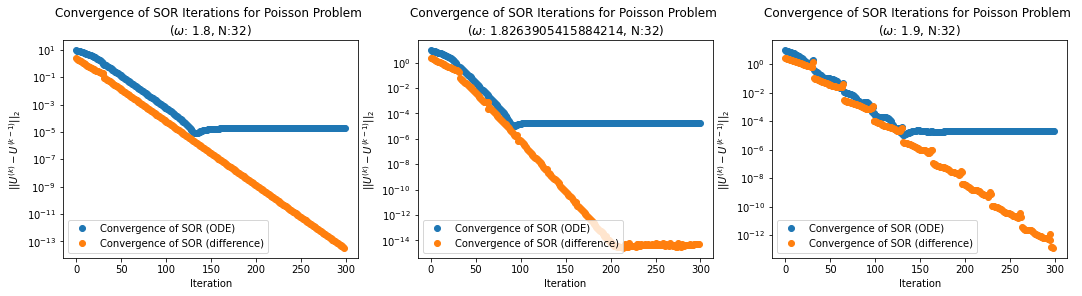

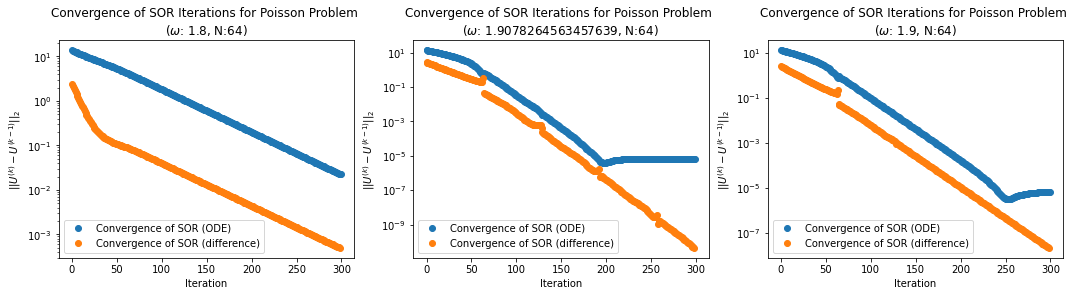

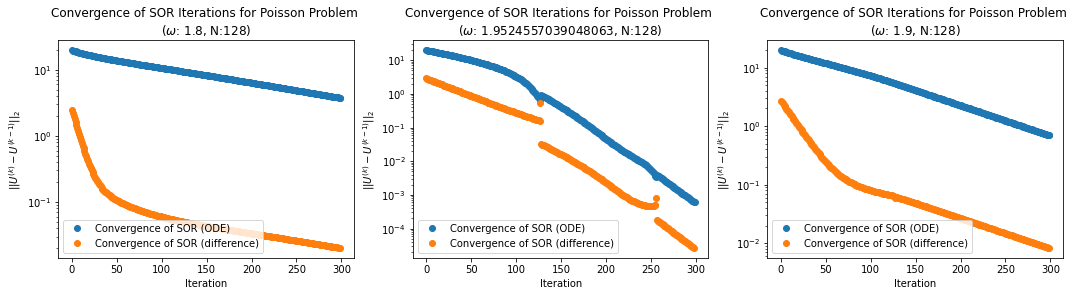

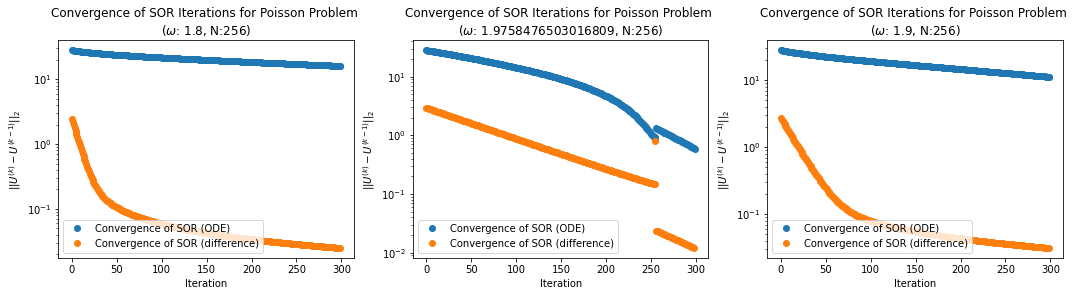

In [2]:
# YOUR CODE HERE

# Problem setup
a = 0.0 
b = 1.0 
u_a = 0.0 
u_b = 3.0 
f = lambda x: -1 * numpy.sin(x) 
u_true = lambda x: (3 - numpy.sin(1))*x + numpy.sin(x)

# Descretization
N = [32, 64, 128, 256]
for (j, n) in enumerate(N):
    x_bc = numpy.linspace(a, b, n + 2)
    x = x_bc[1:-1]
    delta_x = (b - a) / (n + 1)
    
    # SOR parameters 
    omega_opt = 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x))
    omega = [1.8, omega_opt, 1.9]
    
    # expected iterations 
    iterations_SOR = 300 
    
    # solve system 
    # initial guess for iterations 
    fig = plt.figure()
    fig.set_figwidth(fig.get_figwidth()*3)
    
    for x in range(3):
        U = numpy.zeros(n + 2)
        U[0] = u_a
        U[-1] = u_b
        
        convergence_SOR_ode = numpy.zeros(iterations_SOR)
        convergence_SOR_diff = numpy.zeros(iterations_SOR)
        for k in range(iterations_SOR):
            for i in range(1, n + 1):
                U_gs = 0.5 * (U[i-1] + U[i+1] - delta_x**2 * f(x_bc[i]))
                U[i] += omega[x] * (U_gs - U[i])

            convergence_SOR_ode[k] = numpy.linalg.norm(u_true(x_bc) - U, ord=2)
            if k != 0:
                convergence_SOR_diff[k-1] = numpy.linalg.norm(U - U_prev, ord = 2)
            U_prev = U.copy()

    
        # Plot result
        axes = fig.add_subplot(1, 3, x + 1)
        axes.semilogy(range(iterations_SOR), convergence_SOR_ode, 'o', label="Convergence of SOR (ODE)")
        axes.semilogy(range(iterations_SOR), convergence_SOR_diff, 'o', label="Convergence of SOR (difference)")
        axes.legend(loc=3)
        axes.set_title(f"Convergence of SOR Iterations for Poisson Problem \n($\omega$: {omega[x]}, N:{n})")
        axes.set_xlabel("Iteration")
        axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")
        
    plt.show()
    

**(b)** [5] Describe what you observe from part (a).  Please comment on the following
1. Comment on the convergence rates, how steady are they (are the slopes constant).
2. Compare the optimal value of $\omega$ vs. the others.
3. Why do you suppose those kinks in some of the convergence rates are happening?
4. Describe and explain the different behavior between the convergences we plotted in each plot.
5. For the $N = 32$ case why does the error convergence stall?

YOUR ANSWER HERE

1. Convergence rates: 
> The slopes for the convergence rates were for the most part not constant, and therefore not steady. For the convergence rates in the norm of the ODE, except for when $\omega = 1.8, \text{with} N = 128, 256, \text{and} \omega = 1.9, N = 256$, the convergence rates were not steady. For the convergence rates of the norm of the difference between the subsequent steps of the iteration count, the only approximately steady convergence rate was when $\omega = 1.8, N = 32$. We can clearly see that the convergence rate for the latter converge more quickly to the true solution than that of the ODE, and that as the number of iterations $N$ increases, the convergence rates tend to decrease (i.e. converges more slowly). 

2. Comparison of optimal values of $\omega$: 
> The convergence rates with the optimal $\omega$ tend to converge more quickly compared to other convergences with the same $N$. 


3. Why do you suppose those kinks in some of the convergence rates are happening? 
> The "kinks" i.e. the discontinuities/breaks occur because the convergence rates for nonlinear problems can  change as the iterations increase. In other words, as $N$ increases, if a better solution and therefore lower difference is found, we experience jumps in the convergence rates. 

4. Different behaviors between the convergences:
> For the convergence rates of the norm of the ODE, as $\omega$ approaches its optimal value, the convergence rates increase. Furthermoe, an increase in the number of iterations results in slower convergence rates. 

5. Error convergence stalling for $N = 32$: 
> For $N = 32$, the error conergence stalls because the minimum norm reaches $10^{-15}$, which is approximately equal to machine error, and because it cannot reach better accuracy. 

**(c)** [5] Let $g(\omega) = \rho(G(\omega))$ be the spectral radius of the iteration matrix $G$ for a given value of $\omega$.  Write a function that computes $g(\omega)$ for a given value of $\omega$ and $N$.

In [3]:
# spectral radius = largest absolute value of eigenvalues for iteration matrix G
# from Lecture note 14 : LA iterative

def g(omega, N):
    
    A = numpy.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                A[i,j] = 2
            if (i == (j+1)) or (i == (j-1)):
                A[i,j] = -1
                
    L, U = numpy.zeros((N, N)), numpy.zeros((N, N))
    D = numpy.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                D[i,j] = A[i,j]
            if i > j:
                L[i,j] = A[i,j]
            if i < j:
                U[i,j] = A[i,j]
    
    M, matrixN = numpy.zeros((N, N)), numpy.zeros((N, N))
    M = (1/omega)*(D - omega * L)
    matrixN = (1/omega)*((1 - omega) * D + (omega * U))
    
    G = numpy.zeros((N, N))
    G = numpy.dot(numpy.linalg.inv(M), matrixN)
    
    eigenvalues = numpy.linalg.eigvals(G)
    p = max(numpy.abs(eigenvalues))
    spec_radius = p
        
    return spec_radius

In [4]:
numpy.testing.assert_allclose(0.93967633319, g(1.93967633319, 100), atol=1e-8)
print("Success!")

Success!


**(d)** [5] Plot the function $g(\omega)$ for $N = [8, 16, 32, 64]$ for $\omega \in [0, 3.5]$ (you may not be able to go all the way to 0).  Also find the optimal $\omega$ using an appropriate numerical method from class to within $10^{-8}$ of the **known optimal value** and plot the minimum on your plots.  Also plot lines on your figures representing the values of $g(\omega)$ that will diverge and our theoretical range of valid $\omega$s.

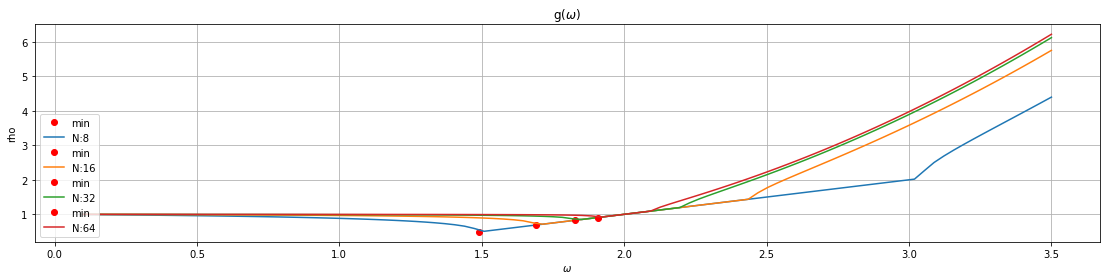

In [10]:
# YOUR CODE HERE

tol = 1e-8
MAX_STEPS = 100

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*7)
axes = fig.add_subplot(1, 2, 1)

# finding omega_opt using the golden search bracket (from Lecture 5 Notes)
N = [8, 16, 32, 64]
phi = (numpy.sqrt(5.0) - 1.) / 2.0
for (j, n) in enumerate(N): 
    t = numpy.linspace(0.1, 3.5, 100)
    delta_x = 1 / (n + 1)
    omega_opt = 2 / (1 + numpy.sin(numpy.pi + delta_x))
    
    # using golden search bracekt 
    x = [0.2, None, None, 3.2]
    deltx = x[3] - x[0]
    x[1] = x[3] - phi * deltx
    x[2] = x[0] + phi * deltx
    
    for k in range(1, MAX_STEPS + 1):
        g_1 = g(x[1], n)
        g_2 = g(x[2], n)
            
        if g_1 < g_2:
            # Pick the left bracket
            x_new = [x[0], None, x[1], x[2]]
            deltx = x_new[3] - x_new[0]
            x_new[1] = x_new[3] - phi * deltx
        else:
            # Pick the right bracket
            x_new = [x[1], x[2], None, x[3]]
            deltx = x_new[3] - x_new[0]
            x_new[2] = x_new[0] + phi * deltx
        x = x_new
        
        if numpy.abs(x[0] - omega_opt) < tol:
            break
            
    axes.plot(x[0],g(x[0],n),'ro', label="min")        
    omega = numpy.linspace(0.1,3.5,100)
    gg = numpy.zeros(100)
    for i in range(100):
        gg[i] = g(omega[i], n)
    axes.plot(omega, gg, '-', label=f"N:{n}")

axes.set_title("g($\omega$)")
axes.set_xlabel("$\omega$")
axes.set_ylabel("rho")
axes.legend(loc=3)

plt.grid()
plt.show()

**(e)** [5] Comment on what you observe and interpret the changes in the function $g(\omega)$, especially for $\omega > 2$.

YOUR ANSWER HERE

By the properties of the spectral radius $g(\omega)$, determined by the maximum of the absolute values of the eigenvalues, we know that if $\omega > 1$, then $g$ diverges. We can see this in the graph above, the $g(\omega)$ for each $N$ start to diverge as $\omega$ approaches 2. 

## Question 4

Determine the coefficients $\beta_0,~\beta_1,~\beta_2$ for the third
order, 2-step Adams-Moulton method.  We will do this two different ways:

**(a)** [15] Using the general expression for the local truncation error for multi-step methods
$$
    \tau^{n + r} = \frac{1}{\Delta t} \left (\sum^r_{j=0} \alpha_j u(t_{n+j}) - \Delta t \sum^r_{j=0} \beta_j f(u(t_{n+j})) \right ).
$$
Note that $\alpha_0 = 0$, $\alpha_1 = -1$, and $\alpha_2 = 1$.

YOUR ANSWER HERE

Reference: lecture number 9: ODE ivp part 1

From lecture notes, we know that using the general expansion and evalutation of the Taylor series about $t_n$, we end up with 

$$
\begin{aligned}
    T(t, u; \Delta t) &= \frac{1}{\Delta t}\left( \sum^r_{j=0} \alpha_j\right) u(t_n) + \left(\sum^r_{j=0} (j\alpha_j - \beta_j)\right) u'(t_n) + \Delta t \left(\sum^r_{j=0} \left (\frac{1}{2}j^2 \alpha_j - j \beta_j \right) \right) u''(t_n) \\
& \quad \quad + \cdots + \Delta t^{q - 1} \left (\sum^r_{j=0} \left(\frac{1}{q!} j^q \alpha_j - \frac{1}{(q-1)!} j^{q-1} \beta_j \right) \right) u^{(q)}(t_n) + \cdots
\end{aligned}
$$

Since we are using the 2-step Adams-Moulton method, we set $r = 2$. We want the first 2 terms to = 0, so that the method is consistent. 

$\textbf{1st term: }$ We verify that the summation = 0

$$ 
    \sum^2_{j=0} \alpha_j = \alpha_0 + \alpha_1 + \alpha_2 = 0 - 1 + 1 = 0 
$$

$\textbf{2nd term: }$ 

$$ \begin{aligned}
    \sum^2_{j=0} (j \alpha_j - \beta_j) &= (0(\alpha_0) - \beta_0) + (\alpha_1 - \beta_1) + (2\alpha_2 - \beta_2) = 0\\
    &= -\beta_0 - 1 - \beta_1 + 2 - \beta_2 \\
    \rightarrow& \beta_0 + \beta_1 + \beta_2 = -1 + 2 = 1 \\
\end{aligned}
$$

We verify that $\sum^r_{j=0} j \alpha_j = \sum^r_{j=0} \beta_j$ (which is true). So we get $\beta_0 + \beta_1 + \beta_2 = 1 $. 

$\textbf{3rd term: }$ 

$$ \begin{aligned}
    \sum^2_{j=0} (\frac{1}{2}j^2 \alpha_j - j \beta_j) &= 1 \\
    &= \frac{1}{2}(0)^2\alpha_j - (0)\beta_j) + (\frac{1}{2}\alpha_1 - \beta_1) + (\frac{1}{2}(4)\alpha_2 - 2\beta_2) \\
    &= -\frac{1}{2} - \beta_1 + 2 - 2\beta_2 = 1 \\ 
    -\beta_1 - 2\beta_2 = 1-2+\frac{1}{2}
\end{aligned}
$$

So we get $\beta_1 + 2\beta_2 = \frac{1}{2}$. 

$\textbf{4th term: }$ $q = 3$ so 


$$ \begin{aligned}
    \sum^2_{j=0} &(\frac{1}{3!}j^3 \alpha_j - \frac{1}{2!} j^2 \beta_j) = 1 \\
    &= (\frac{1}{6}(0)\alpha_0 - \frac{1}{2}(0)\beta_0) + (\frac{1}{6}\alpha_1 - \frac{1}{2}\beta_1) + (\frac{1}{6}8 \alpha_2 - \frac{1}{2}4\beta_2) \\
    &= -\frac{1}{6} - \frac{1}{2}\beta_1 + \frac{8}{6} - 2 \beta_2 = 1 \\ 
    -\frac{1}{2}\beta_1 - 2\beta_2 &= 1 - \frac{7}{6}
\end{aligned}
$$

So $\frac{1}{2}\beta_1 + 2\beta_2 = \frac{1}{6}$.

So then we obtain a system of equations from which we can solve for $\beta_0, \beta_1, \beta_2$:

$$ 
    \beta_0 + \beta_1 + \beta_2 = 1  \\
    \beta_1 + 2\beta_2 = \frac{1}{2} \\
    \frac{1}{2}\beta_1 + 2\beta_2 = \frac{1}{6}
$$

> Subtraction eq 3 from eq 2: $\beta_1 = \frac{2}{3}$

> Plugging that value into eq 2 gives us: $\beta_2 = -\frac{1}{12}$

> Plugging these values into eq 1: $\beta_0 = \frac{5}{12}$

So finally: $\beta_0 = \frac{5}{12}, \beta_1 = \frac{2}{3}, \beta_2 = -\frac{1}{12}$ derived using the 2-step Adams-Moulton method.

**(b)** [15] Using the relation
$$
    u(t_{n+2}) = u(t_{n+1}) + \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds.
$$
Interpolate  a quadratic polynomial $p(t)$ through the three values $f(U^n),~f(U^{n+1})$ and $f(U^{n+2})$ and then integrate this polynomial exactly to obtain the formula.  The coefficients of the polynomial will depend on the three values $f(U^{n+j})$.   It's easiest to use the "Newton form" of the interpolating polynomial and consider the three
times $t_n=-\Delta t$, $t_{n+1}=0$, and $t_{n+2}=\Delta t$ so that $p(t)$ has the form
$$
    p(t) = A + B(t+\Delta t) + C(t+\Delta t)t
$$
where $A,~B$, and $C$ are the appropriate divided differences based on the data.  Then integrate from $0$ to $\Delta t$.   (The method has the same coefficients at any time, so this is valid.)

YOUR ANSWER HERE

Given the interpolating quadratic polynomial of the form $p(t) = A + B(t + \Delta t) + C(t + \Delta t)t$, we take the integral from $0$ to $\Delta t$. 

$$ \begin{aligned}
    p(t) &= A + B(t + \Delta t) + C(t + \Delta t)t \\
    &= A + Bt + B\Delta t + Ct^2 + Ct \Delta t \\
    \int_{t_{n+1}}^{t_{n+2}}\,p(t)\,dt &= \int_0^{\Delta t} (A + Bt + B\Delta t + Ct^2 + Ct \Delta t)\,dt \\
    &= At + \frac{1}{2}Bt^2 + Bt \Delta t + \frac{1}{3}Ct^3 + \frac{1}{2}Ct^2 \Delta t \, \bigg\rvert_0^{\Delta t} \\
    &= A \Delta t + B(\frac{1}{2}\Delta t^2 + \Delta t^2) + C(\frac{1}{3}\Delta t^3 + \frac{1}{2}\Delta t^3) \\
    &= A \Delta t + \frac{3}{2}B \Delta t^2 + \frac{5}{6}C \Delta t^3
\end{aligned}
$$

From the relation $u(t_{n+2}) = u(t_{n+1}) + \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds$, i.e. $u(t_{n+2}) - u(t_{n+1}) = \int_{t_{n+1}}^{t_{n+2}}\,f(u(s))\,ds$, and we can find $A, B, C$ in terms of $f(u_n), f(u_{n+1}), f(u_{n+2})$: 

$$ \begin{aligned}
    A &= f(u_n) \\ 
    A + B\Delta t = f(u_{n+1}) \Longrightarrow B &= \frac{f(u_{n+1}) - f(u_n)}{\Delta t} \\ 
    A + 2\Delta t B + 2\Delta t^2 C = f(u_{n+2}) \Longrightarrow C &= \frac{f(u_{n+2}) - A - 2\Delta t B}{2 \Delta t^2} \\ 
    &= \frac{f(u_{n+2}) - 2 (f(u_{n+1}) - f(u_n)) - f(u_n)}{2 \Delta t^2} \\
    &= \frac{f(u_{n+2}) - 2f(u_{n+1}) + f(u_n)}{2 \Delta t^2}
\end{aligned}
$$

Plugging $A, B, C$ in terms of $f(u_n), f(u_{n+1}), f(u_{n+2})$ into the integral of $p(t)$:

$$ \begin{aligned}
    A \Delta t + \frac{3}{2}B &\Delta t^2 + \frac{5}{6}C \Delta t^3  \\ 
    &=f\left( u_{n}\right) \Delta t+\dfrac{3}{2}\Delta t^{2}\left( \dfrac{f\left( u_{n+1}\right) -f\left( u_{n}\right) }{\Delta t}\right) +\dfrac{5}{6}\Delta t^{3}\left( \dfrac{f\left( u_{n+2}\right) -2f\left( u_{n+1}\right) +f\left( u_{n}\right) }{2\Delta t^{2}}\right) \\
    &= f\left( u_{n}\right) \Delta t+\dfrac{3}{2}\Delta t\left( f\left( u_{n+1}\right) -f\left( u_{n}\right) \right) +\dfrac{5}{12}\Delta t( f\left( u_{n+2}\right) -2f\left( u_{n+1}\right) +f\left( u_{n}\right) \\
    &= \Delta t\left( f\left( u_{n}\right) +\dfrac{3}{2}f\left( u_{n+1}\right) -\dfrac{3}{2}f\left( u_{n}\right) +\dfrac{5}{12}f\left( u_{n+2}\right) -\dfrac{5}{6}f\left( u_{n+1}\right) +\dfrac{5}{12}f\left( u_{n}\right) \right) \\
    &= \Delta t\left( -\dfrac{1}{12}f\left( u_{n}\right) +\dfrac{2}{3}f\left( u_{n+1}\right) +\dfrac{5}{12}f\left( u_{n+2}\right) \right) 
\end{aligned}
$$

So finally, $= \frac{\Delta t}{12} \left( -f\left( u_{n}\right) +8f\left( u_{n+1}\right) + 5f\left( u_{n+2}\right) \right)$